In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('ortopedik_hastaların_biyomekanik_özellikleri.csv')
df.head()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df["class"] = [1 if each == "Abnormal" else 0 for each in df["class"]]
df.head()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt_numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [6]:
df.describe()

,pelvic_incidence,pelvic_tilt_numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,1.000000


In [7]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt_numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

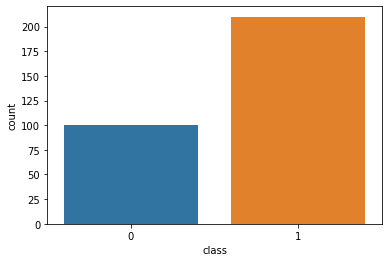

In [8]:
sns.countplot(x='class', data=df)

In [9]:
x = df.iloc[:,0:6]
y = df.iloc[:,6:].values

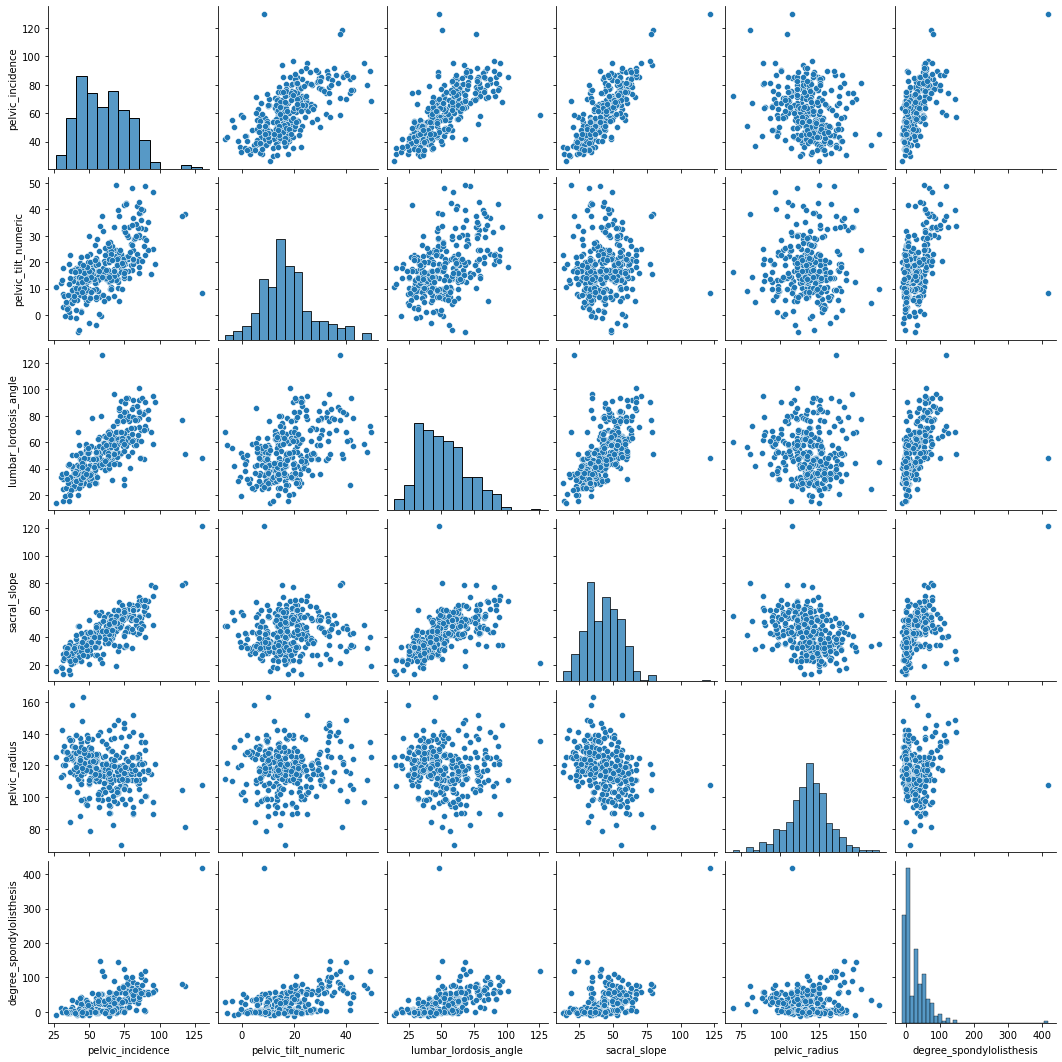

In [10]:
sns.pairplot(x)
plt.show()

In [11]:
x = df.iloc[:,0:6].values

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)

In [13]:
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [14]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Logistic Regression")
print(cm)

Logistic Regression
[[29  8]
 [10 56]]


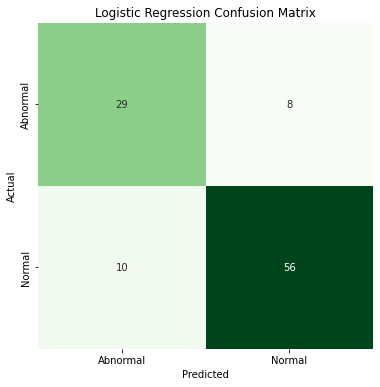

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'Greens')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [16]:
my_tags = ['Abnormal', 'Normal']

In [17]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.74      0.78      0.76        37
      Normal       0.88      0.85      0.86        66

    accuracy                           0.83       103
   macro avg       0.81      0.82      0.81       103
weighted avg       0.83      0.83      0.83       103



In [18]:
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("KNeighbors")
print(cm)

KNeighbors
[[23 14]
 [16 50]]


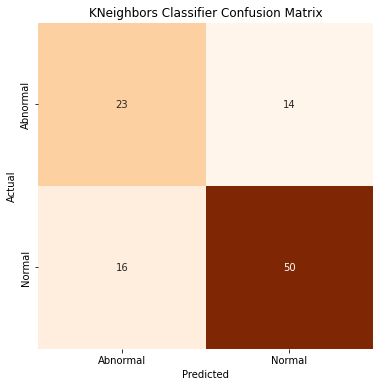

In [19]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'Oranges')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNeighbors Classifier Confusion Matrix")
plt.show()

In [20]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.59      0.62      0.61        37
      Normal       0.78      0.76      0.77        66

    accuracy                           0.71       103
   macro avg       0.69      0.69      0.69       103
weighted avg       0.71      0.71      0.71       103



In [21]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)

SVC
[[27 10]
 [ 8 58]]


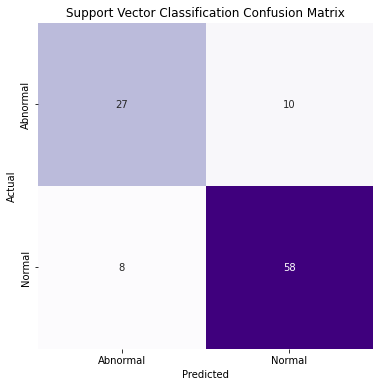

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'Purples')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Support Vector Classification Confusion Matrix")
plt.show()

In [23]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.77      0.73      0.75        37
      Normal       0.85      0.88      0.87        66

    accuracy                           0.83       103
   macro avg       0.81      0.80      0.81       103
weighted avg       0.82      0.83      0.82       103



In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)

GNB
[[28  9]
 [18 48]]


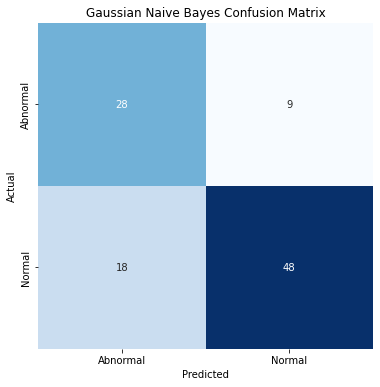

In [25]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'Blues')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()

In [26]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.61      0.76      0.67        37
      Normal       0.84      0.73      0.78        66

    accuracy                           0.74       103
   macro avg       0.73      0.74      0.73       103
weighted avg       0.76      0.74      0.74       103



In [27]:
dtc = DecisionTreeClassifier(criterion = 'gini')
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)

DTC
[[26 11]
 [ 7 59]]


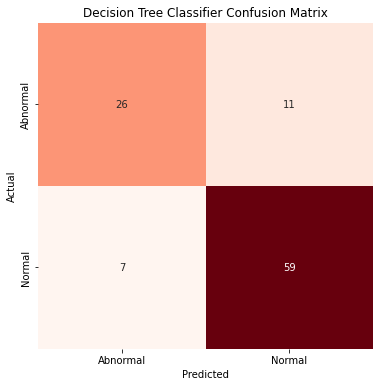

In [28]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'Reds')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show()

In [29]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.79      0.70      0.74        37
      Normal       0.84      0.89      0.87        66

    accuracy                           0.83       103
   macro avg       0.82      0.80      0.81       103
weighted avg       0.82      0.83      0.82       103



In [36]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'gini')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)

RFC
[[29  8]
 [11 55]]


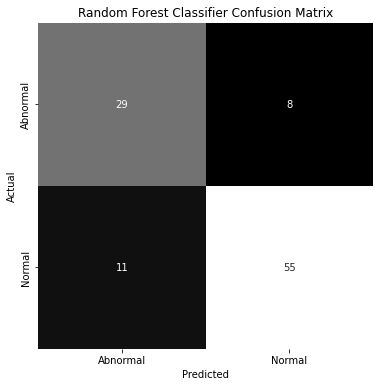

In [37]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot = True, cbar = False, cmap = 'gray')
plt.xticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.yticks(np.arange(2) + 0.5, ['Abnormal', 'Normal'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier Confusion Matrix")
plt.show()

In [38]:
print(classification_report(y_test, y_pred,target_names=my_tags))

              precision    recall  f1-score   support

    Abnormal       0.72      0.78      0.75        37
      Normal       0.87      0.83      0.85        66

    accuracy                           0.82       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.82      0.82       103

